<a href="https://colab.research.google.com/github/Anshuman17092005/Linear-Regression/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The objective of this project is to analyze the factors affecting the performance of the student and build a regression model to predict Performance index of student based on different features.

# Data Overview

The dataset consists of numerical features such as Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced and categorical features like Extracurricular activities. Performance Index is the target feature which represents the student's overall performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Student_Performance.csv')

# Target Variable Analysis

<Axes: xlabel='Performance Index', ylabel='Count'>

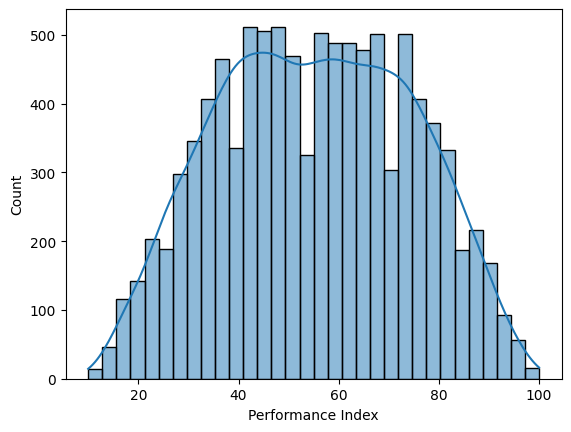

In [ ]:
sns.histplot(df['Performance Index'],kde = True)

The target variable is normally distributed with no extreme skewness.  
So it is suitible for linear regression modelling.

# Univariate Analysis

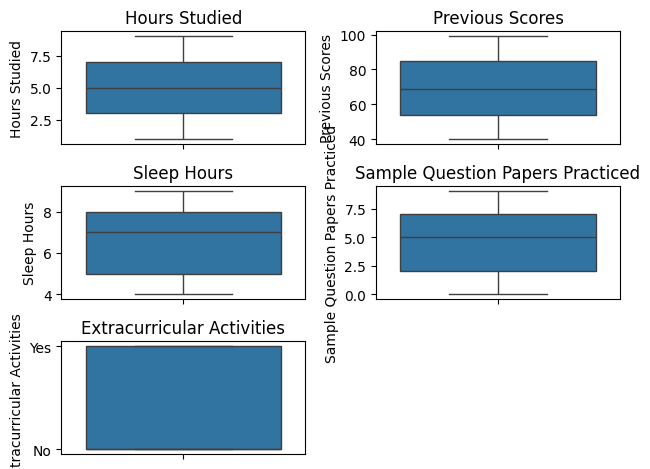

In [ ]:
def plotting(col,n):
  plt.subplot(3,2,n)
  sns.boxplot(df[col])
  plt.title(col)
  plt.tight_layout()

plotting('Hours Studied',1)
plotting('Previous Scores',2)
plotting('Sleep Hours',3)
plotting('Sample Question Papers Practiced',4)
plotting('Extracurricular Activities',5)

There are no major outliers on our dataset indicating a stable data for regression.


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

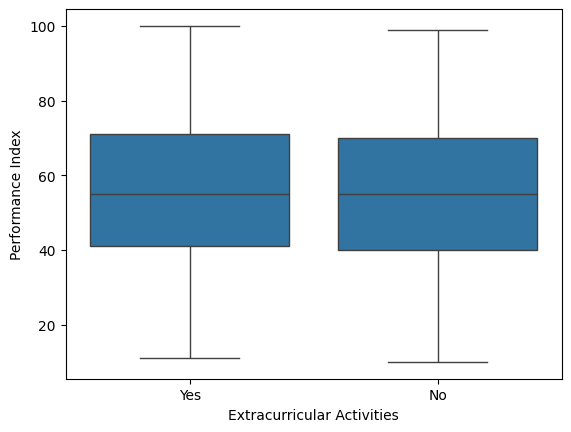

In [ ]:
sns.boxplot(x = df['Extracurricular Activities'],y = df['Performance Index'])

Student with extracurricular Activities have a little higher Performance Index

# Feature to feature relationship

<Axes: >

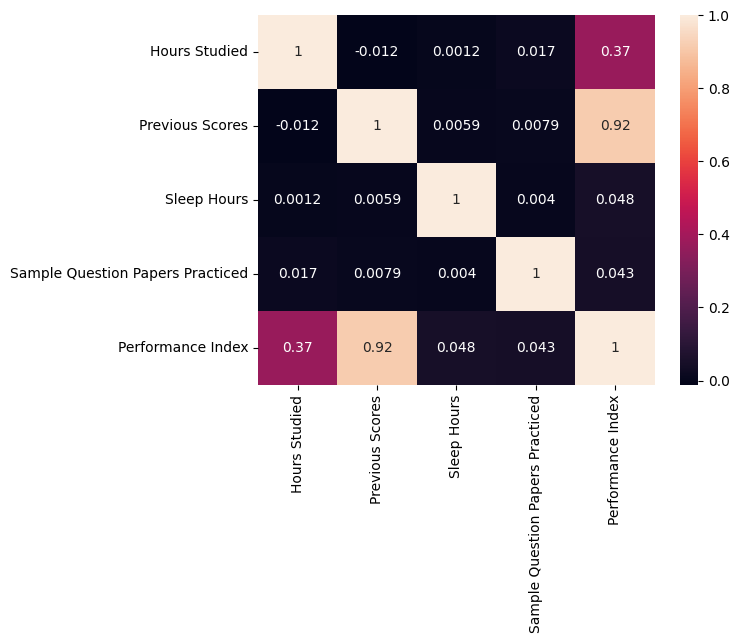

In [ ]:
sns.heatmap(df.corr(numeric_only = True) , annot = True)

Some features show moderate correlation but no severe multicollinearity is observed.

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

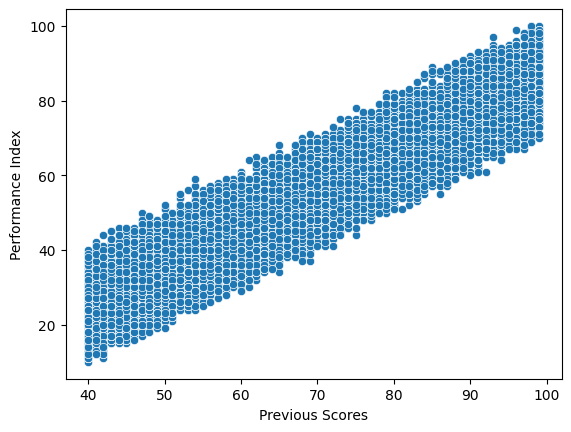

In [ ]:
sns.scatterplot(x = 'Previous Scores',y = 'Performance Index',data = df)

#Key EDA Insights

*   The target variable is normally distributed.
*   Features have no significant outliers or multicollinearity detected.
*   Previous Scores and Hours Studied shows a positive impact on Performance Index.

Based on this insights Linear Regression is selected as basekine model.

# Data Preprocessing

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({
    'No': 0,
    'Yes': 1
})

Since Extracurricular Activities is a binary categorical feature,I encoded it with 0 and 1 so that it can be used by the regression model without creating artificial ordering.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Performance Index',axis = 1)
y = df['Performance Index']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.20,random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Building

In [ ]:
y_baseline = np.full_like(y_test, y_train.mean(), dtype=float)

baseline_mae = mean_absolute_error(y_test, y_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_r2 = r2_score(y_test, y_baseline)

baseline_mae, baseline_rmse, baseline_r2

(16.155763, np.float64(19.178509848265062), -9.304350308436682e-06)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df

,Feature,Coefficient
1,Previous Scores,17.670769
0,Hours Studied,7.402698
3,Sleep Hours,0.826998
4,Sample Question Papers Practiced,0.470690
2,Extracurricular Activities,0.302718


Previous score and Hours Studied has highest positive impact on Performance Index


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2,mae,mse,rmse

(0.9886823435388216,
 1.6205145807621557,
 4.162767795656084,
 np.float64(2.0402862043488126))

* MAE indicates average prediction error in original units.
* RMSE penalizes larger errors more heavily.
* R² score shows that the model explains most of the variance in the target variable.

The baseline model predicts the mean performance index for all students.
The linear regression model significantly outperforms this baseline, confirming that the learned relationships are meaningful.

#Overfitting check

In [ ]:
train_r2 = model.score(X_train,y_train)
test_r2 = model.score(X_test,y_test)
train_r2,test_r2

(0.9888680836042563, 0.9886823435388216)

Train and test score are close, so there is no overfitting.

#Residual Analysis

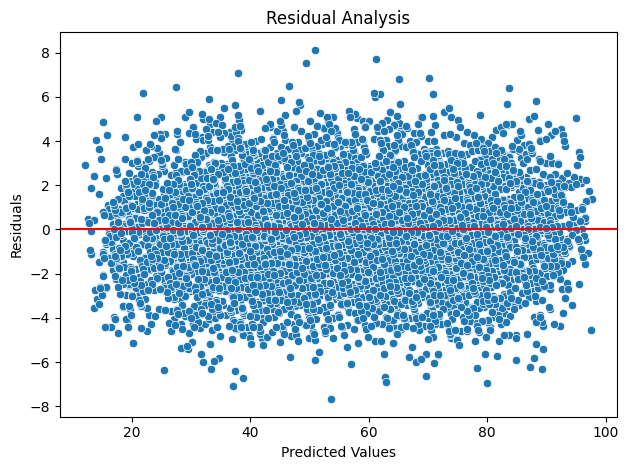

In [ ]:
residuals = y_test - y_pred
sns.scatterplot(x = y_pred,y = residuals)
plt.axhline(y = 0,color= 'red')
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()

Residuals are randomly scatter around zero,suggeting that Linear regression assumptions are reasonably satisfied

#Conclusion

This notebook shows complete regression workflow from EDA,preprocessing,modelling and evaluation. The analysis shows that academic factors such as Hours Studied and previous scores plays a significant role in predicting student's performance. The linear regression performs well and serves as a strong baseline for future improvements.